In [1]:
%load_ext autoreload
%autoreload 2

from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from scipy.stats import rankdata
from graph_generation import rndm


from normalizations import normalize_sequence, cdf_normalization, power_transform, log_transform, probability_transform
from normalizations import barre_errore, get_unique_ys_4_unique_errors, degree_normalizations, get_error_bars_2plot, plot_1

In [29]:
def make_barabsi(n):
    # Generazione della rete Power Law
    G_barabasi = nx.barabasi_albert_graph(n, m)
    degrees_barabasi = np.array([d for n, d in G_barabasi.degree()])
    return degrees_barabasi

def make_er(n, p):
    # Generazione della rete Erdos-Renyi
    #p = 0.3  # Probabilità che un link esista tra due nodi nella rete Erdos-Renyi
    G_erdos_renyi = nx.erdos_renyi_graph(n, p)
    degrees_erdos_renyi = np.array([d for n, d in G_erdos_renyi.degree()])
    return degrees_erdos_renyi

def make_powerlaw(n, exp):
    s = rndm(3, n, exp, n)
    s = np.array(s, int)
    if s.sum() % 2 != 0:
        s[-1] += 1
    G_power_law = nx.configuration_model(s)
    degrees_power_law = np.array([d for n, d in G_power_law.degree()])
    return degrees_power_law


In [30]:
# varii grafi al variare di p e exp
# Creazione di una rete Power Law e una Erdos-Renyi
num_nodes = 3500  # Numero di nodi

degrees_erdos_renyi = make_er(num_nodes, p=0.3)

#m = 3    # Numero di link da aggiungere per ogni nuovo nodo nella rete Power Law (Barabasi)
exponent = -2.5
degrees_power_law = make_powerlaw(num_nodes, exponent)

In [30]:
ps = [ 0.1, 0.5,  0.9]
many_degrees_er = []
for p in ps:
    many_degrees_er.append(make_er(num_nodes, p))
    
    
exponents = [-1.5, -2.5, -3.5]
many_degrees_pl = []
for exp in exponents:
    many_degrees_pl.append(make_powerlaw(num_nodes, exp))

In [35]:
# Generiamo due sequenze di grado: una come 'sequenza originale' e una come 'sequenza predetta'
# In questo contesto, la 'sequenza predetta' è solo una versione leggermente rumorosa della sequenza originale
#np.random.seed(0)  # Per la riproducibilità
# Simuliamo una 'sequenza di grado predetta' come una versione rumorosa della sequenza originale
# Assumiamo che il 'modello' sia imperfetto e aggiunga un po' di rumore casuale
noise = np.random.randint(-5, 6, size=num_nodes)   


predicted_degrees_er = np.clip(degrees_erdos_renyi + noise, a_min=0.0, a_max=np.inf)  # Evitiamo valori negativi
predicted_degrees_pl = np.clip(degrees_power_law + noise, a_min=1.0, a_max=np.inf)  # Evitiamo valori negativi
#predicted_degrees_bb = np.clip(degrees_barabasi + noise, a_min=1.0, a_max=np.inf)

#plt.hist(degrees_erdos_renyi, bins=50,#bins=range(min(normalized_degrees_erdos_renyi), max(normalized_degrees_erdos_renyi) + 1), 
#         alpha=0.75, color='green');

In [3]:
def plot(pred_er, orig_er, pred_pl, orig_pl, lim01=True, pred_bb=None, orig_bb=None):
    # Plotting delle sequenze di grado normalizzate
    plt.figure(figsize=(16, 5))

    # Power Law
    plt.subplot(1, 3, 1)
    #plt.scatter(orig_er, pred_er, c='blue')
    plt.plot(orig_er, pred_er, linestyle='', marker='.', markersize=3, alpha=0.5)
    if lim01:
        plt.plot([0, 1], [0, 1], 'r--', label='Ideal')
    plt.title('Erdos-Renyi')
    #plt.xlabel('Node Index')
    #plt.ylabel('Normalized Degree')
    plt.legend()    
    
    # Erdos-Renyi
    plt.subplot(1, 3, 2)
    #plt.scatter(orig_pl, pred_pl, c='blue')
    plt.plot(orig_pl, pred_pl, linestyle='', marker='.', markersize=3, alpha=0.5)
    if lim01:
        plt.plot([0, 1], [0, 1], 'r--', label='Ideal')
    plt.title('Power law')
    #plt.xlabel('Node Index')
    #plt.ylabel('Normalized Degree')
    plt.legend()
    
    if pred_bb is not None and orig_bb is not None:
        plt.subplot(1, 3, 3)
        plt.scatter(orig_bb, pred_bb, c='blue')
        if lim01:
            plt.plot([0, 1], [0, 1], 'r--', label='Ideal')
        plt.title('Barabasi Albert')
        #plt.xlabel('Node Index')
        #plt.ylabel('Normalized Degree')
        plt.legend()

    # Mostra il plot    
    plt.tight_layout()
    plt.show()
    
def norm_and_plot(norm_func, **kwargs):
    pred_er = norm_func(predicted_degrees_er, **kwargs)
    orig_er = norm_func(degrees_erdos_renyi, **kwargs)
    pred_pl = norm_func(predicted_degrees_pl, **kwargs)
    orig_pl = norm_func(degrees_power_law, **kwargs)
    
    orig_bb = norm_func(degrees_barabasi, **kwargs)
    pred_bb = norm_func(predicted_degrees_bb, **kwargs)
    
    plot(pred_er, orig_er, pred_pl, orig_pl) #, True, pred_bb, orig_bb)
    
def apply_f(func):
    return list(map(func, [predicted_degrees_er, degrees_erdos_renyi, predicted_degrees_pl, degrees_power_law]))

# Predicted vs. Input

In [4]:
%%script echo skipping
norm_and_plot(lambda x: x )

skipping


In [5]:
%%script echo skipping
norm_and_plot(lambda x: np.log(x) )

skipping


In [6]:
%%script echo skipping
norm_and_plot(log_transform)

skipping


In [7]:
%%script echo skipping
norm_and_plot(normalize_sequence)

skipping


In [8]:
%%script echo skipping
norm_and_plot(cdf_normalization)

skipping


In [9]:
%%script echo skipping
norm_er = log_transform(degrees_erdos_renyi)
diff_er = predicted_degrees_er - degrees_erdos_renyi

norm_pl = log_transform(degrees_power_law)
diff_pl = predicted_degrees_pl - degrees_power_law

plot(diff_er, norm_er, diff_pl, norm_pl, lim01=False)

skipping


In [10]:
%%script echo skipping
norm_and_plot(power_transform, exponent=(1/2.5))

skipping


In [11]:
%%script echo skipping
for i in [0.001, 0.4,  0.99]:
    pred_pl = power_transform(predicted_degrees_pl, exponent=i)
    orig_pl = power_transform(degrees_power_law, exponent=i)
    plt.plot(orig_pl, pred_pl, linestyle='', marker='.', markersize=2.5)

skipping


# Riprovo con il rank

In [13]:
class Normalizer():
    def __init__(self, degree_sequence, pER=None, exp=None):
        self.rank_norm = None
        self.scale_norm = None
        self.log_norm = None
        self.probs = None
        
        self.pER = pER
        self.exp = exp
        #print(f"p Erdos_renyi = {self.pER} - esponente = {self.exp}")
        
        noise = np.random.randint(-5, 6, size=num_nodes)   
        predicted_degrees = np.clip(degree_sequence + noise, a_min=1.0, a_max=np.inf) 
        
        self.rank_norm, self.scale_norm, self.log_norm, self.probs = degree_normalizations(degree_sequence)
        self.errors, self.unique_ranks, self.unique_degrees, self.unique_norm, self.unique_log, self.unique_prob = \
        get_error_bars_2plot(predicted_degrees, degree_sequence, self.rank_norm, self.scale_norm, self.log_norm, self.probs)
        
    def plot_scaled_normalization(self, ax, f=1, plot_diff_bars=True):
        plot_1(self.rank_norm, self.scale_norm, None, self.unique_ranks, self.unique_norm, self.errors/f, ax, plot_diff_bars, pER=self.pER, exp=self.exp)  
        
    def plot_log_normalization(self, ax, f=1, plot_diff_bars=True):
        plot_1(self.rank_norm, self.log_norm, None, self.unique_ranks, self.unique_log, self.errors/f, ax, plot_diff_bars, pER=self.pER, exp=self.exp)  
        
    def plot_probabilty_transformation(self, ax, f=1, plot_diff_bars=True):
        plot_1(self.rank_norm, self.probs, None, self.unique_ranks, self.unique_prob, self.errors/f, ax, plot_diff_bars, pER=self.pER, exp=self.exp) 
        

In [31]:
rank_norm_er, scale_norm_er, log_norm_er, probs_transf_er = degree_normalizations(degrees_erdos_renyi)
rank_norm_pl, scale_norm_pl, log_norm_pl, probs_transf_pl = degree_normalizations(degrees_power_law)

In [36]:
errors_er, unique_floats_er, unique_degrees_er, unique_norm_er, unique_log_er, unique_prob_er = get_error_bars_2plot(predicted_degrees_er, degrees_erdos_renyi, rank_norm_er, scale_norm_er, log_norm_er, probs_transf_er)
errors_pl, unique_floats_pl, unique_degrees_pl, unique_norm_pl, unique_log_pl, unique_prob_pl = get_error_bars_2plot(predicted_degrees_pl, degrees_power_law, rank_norm_pl, scale_norm_pl, log_norm_pl, probs_transf_pl)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


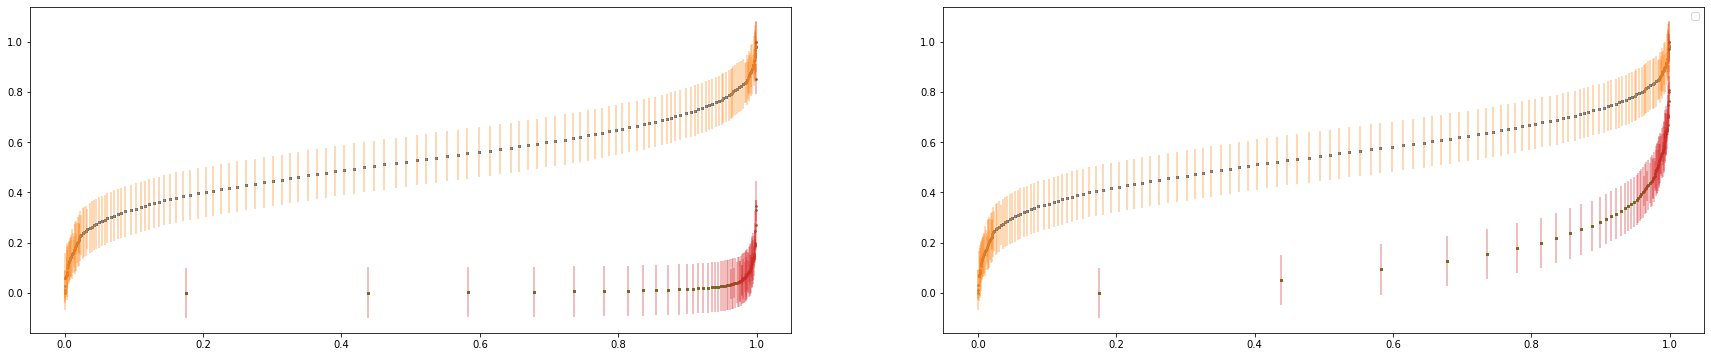

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,6))
#plot_1(rank_norm_er, degrees_erdos_renyi, predicted_degrees_er, unique_floats_er, unique_degrees_er, errors_er, ax1)
plot_1(rank_norm_er, scale_norm_er, None, unique_floats_er, unique_norm_er, errors_er/50, ax1)   # errors_er al posto di  scale_diff_er 
plot_1(rank_norm_pl, scale_norm_pl, None, unique_floats_pl, unique_norm_pl, errors_pl/50, ax1)     #errors_pl al posto di  scale_diff_pl

plot_1(rank_norm_er, log_norm_er, None, unique_floats_er, unique_log_er, errors_er/50, ax2)
plot_1(rank_norm_pl, log_norm_pl, None, unique_floats_pl, unique_log_pl, errors_pl/50, ax2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


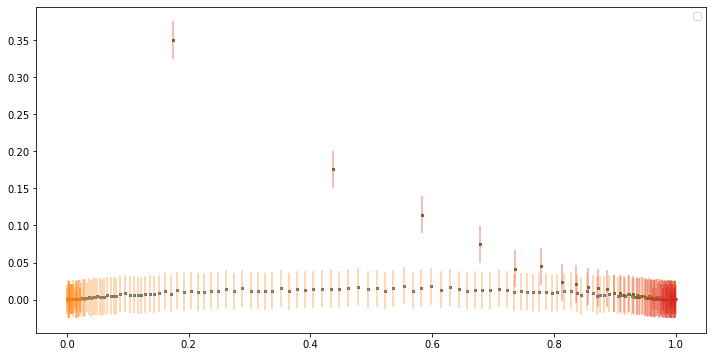

In [40]:
f = 200
fig, ax1 = plt.subplots(1,1, figsize=(12,6))
plot_1(rank_norm_er, probs_transf_er, None, unique_floats_er, unique_prob_er, errors_er/f, ax1)
plot_1(rank_norm_pl, probs_transf_pl, None, unique_floats_pl, unique_prob_pl, errors_pl/f, ax1)

In [50]:
n01 = Normalizer(many_degrees_er[0])

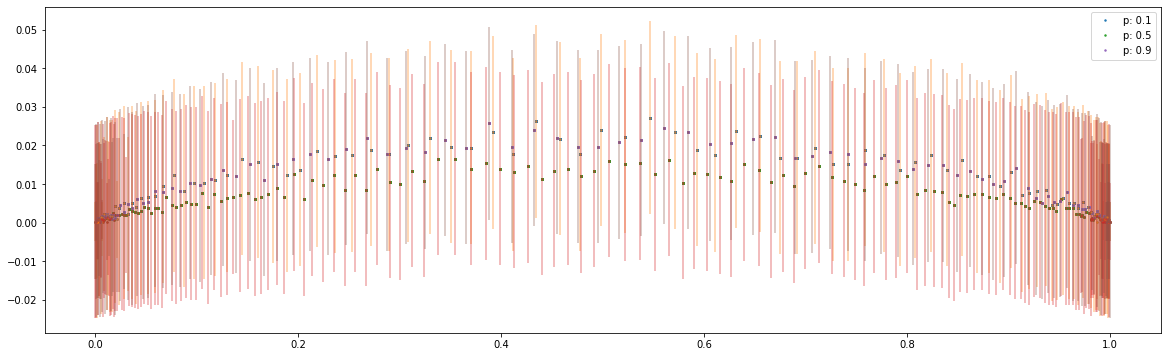

In [47]:
#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
fig, ax1 = plt.subplots(1,1, figsize=(20,6))
for i, d in enumerate(many_degrees_er):
    normaclass = Normalizer(d, pER=ps[i])
    normaclass.plot_probabilty_transformation(ax1, f=200, plot_diff_bars=True)
#plt.legend()
    

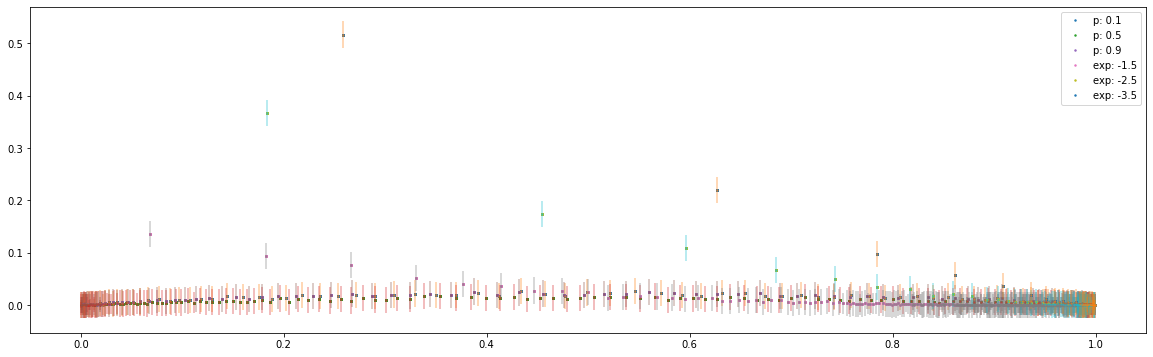

In [45]:
for i, d in enumerate(many_degrees_pl):
    normaclass = Normalizer(d, exp=exponents[i])
    normaclass.plot_probabilty_transformation(ax1, f=200, plot_diff_bars=True)
plt.legend()

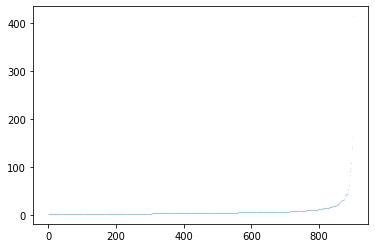

In [17]:
plt.plot( sorted(degrees_power_law), linestyle='', marker='.', markersize=0.1, alpha=1.0)

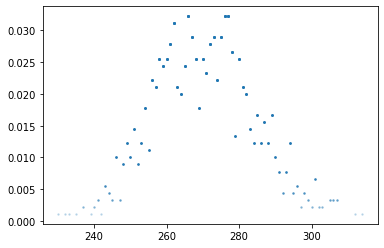

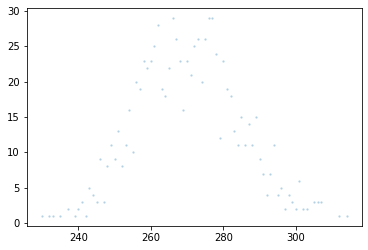

In [18]:
# con probs = np.array([degree_prob_dict[degree] for degree in sequence]) sto ripetendo i nodi con lo stesso grado
# mentre np.unique come anche counter non ripetono ma accorpano i nodi con lo stesso grado nella stessa chiave
# seguita dal valore di frequenza con cui si ripete
plt.plot(degrees_erdos_renyi, probs_transf_er, linestyle='', marker='.', markersize=3, alpha=0.2)
plt.show()
counts = np.unique(degrees_erdos_renyi, return_counts=True)
plt.plot(*counts, linestyle='', marker='.', markersize=3, alpha=0.2)